In [1]:
from test_pop_ini import *

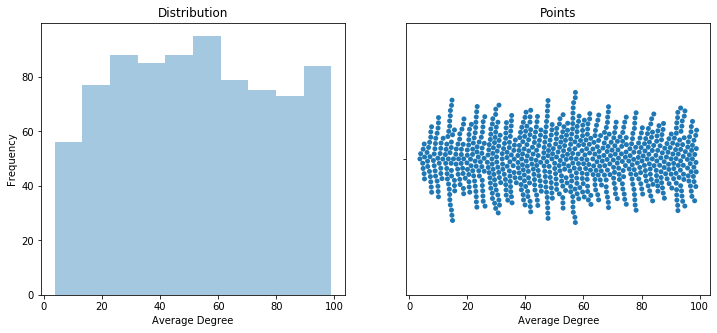

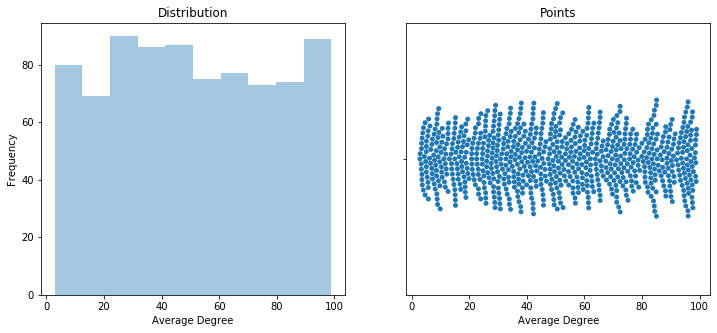

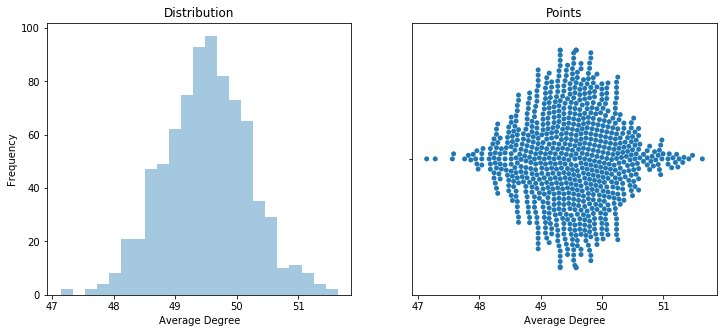

In [5]:
test(saves=["binomial_trick.pdf","binomial.pdf","random_int.pdf"])